In [2]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

<h3>Importing Data</h3>




In [6]:
import stats_can
eco_vec_map = {'Canada total average number of employees':'v1038100698',
               'Canada total wages and salaries expenses':'v1038100699',
               'Pilots total average number of employees':'v1038100686',
               'Pilots total wages and salaries expenses':'v1038100687',
               'Other flight personal total average number of employees':'v1038100686',
               'Other flight personal total wages and salaries expenses':'v1038100687',
               'General management average number of employees':'v1038100690',
               'General management total wages and salaries expenses':'v1038100691',
               'Maintenance personnel average number of employees':'v1038100692',
               'Maintenance personnel total wages and salaries expenses':'v1038100693',
               'Aircraft and traffic servicing average number of employees':'v1038100694',
               'Aircraft and traffic servicing total wages and salaries expenses':'v1038100695',
               'All other employees average number of employees':'v1038100696',
               'All other employees total wages and salaries expenses':'v1038100697',
               'Total operating revenue per employee':'v122615449',
               'Tonne-kilometres flown per employee':'v122615450',
               'Tonne-kilometres flown per employee':'v122615450',
               'Total passengers': 'v122615159',
               'Total hours flown': 'v122615165',
               'Number of carriers': 'v122615158',
               'Total fuel and oil consumption quantity': 'v1038100718',
               'Total fuel and oil consumption expense': 'v1038100719',
               'Total operating revenue, scheduled and charter services': 'v122615327',
               'Total scheduled services': 'v122615328',
               'Total charter services': 'v122615331',
               'All other flight - related revenue': 'v122615334',
               'All other revenue': 'v122615335',
               'Total operating expenses': 'v122615336',

               }

vectors = list(eco_vec_map.values())
df = stats_can.sc.vectors_to_df(vectors, periods = 10)

inv_map = {v: k for k, v in eco_vec_map.items()}
df.columns = df.columns.to_series().map(inv_map)
df.index.names = ['Date']


<h3>Understanding the data </h3>

In [39]:
df.head(10)

,Total fuel and oil consumption quantity,Total fuel and oil consumption expense,Other flight personal total average number of employees,Other flight personal total wages and salaries expenses,General management average number of employees,General management total wages and salaries expenses,Maintenance personnel average number of employees,Maintenance personnel total wages and salaries expenses,Aircraft and traffic servicing average number of employees,Aircraft and traffic servicing total wages and salaries expenses,...,Tonne-kilometres flown per employee,"Total operating revenue, scheduled and charter services",Total scheduled services,Total charter services,All other flight - related revenue,All other revenue,Total operating expenses,Number of carriers,Total passengers,Total hours flown
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6609677.0,5948905.0,10236.0,1162763.0,4276.0,321734.0,12473.0,736133.0,9439.0,423729.0,...,328831.0,20343071.0,17339379.0,1966571.0,80388.0,956733.0,19249356.0,98.0,66867.0,2811.0
2013-01-01,6569619.0,5912745.0,10426.0,1212291.0,4058.0,327102.0,12510.0,742923.0,9513.0,428492.0,...,322947.0,20816397.0,17764855.0,1938455.0,72058.0,1041029.0,19532300.0,97.0,67991.0,2822.0
2014-01-01,6974705.0,6251774.0,10420.0,1214672.0,4495.0,343558.0,12437.0,755559.0,9386.0,434910.0,...,343008.0,22309270.0,18951854.0,1983606.0,87569.0,1286242.0,20665843.0,93.0,72236.0,2921.0
2015-01-01,7070300.0,4874769.0,11261.0,1285216.0,4098.0,357488.0,12357.0,779063.0,9258.0,449534.0,...,357667.0,22832738.0,19804368.0,1455797.0,143014.0,1429559.0,20360220.0,93.0,76216.0,3136.0
2016-01-01,7255284.0,4405646.0,10485.0,1304671.0,3174.0,303145.0,12351.0,765650.0,9928.0,443528.0,...,386277.0,23230889.0,20359136.0,1207187.0,161849.0,1502717.0,21201036.0,98.0,81872.0,3320.0
2017-01-01,8139488.0,5423920.0,11315.0,1382663.0,3188.0,319890.0,12989.0,801956.0,11549.0,467030.0,...,392391.0,25548635.0,22640731.0,1295231.0,225444.0,1387230.0,23295287.0,97.0,88416.0,3358.0
2018-01-01,8510311.0,7002814.0,12163.0,1536323.0,3245.0,361495.0,14051.0,871985.0,12464.0,526547.0,...,394878.0,27970817.0,24992377.0,1384161.0,355066.0,1239214.0,26143574.0,95.0,93337.0,3431.0
2019-01-01,8688108.0,6842669.0,12628.0,1653343.0,3270.0,409143.0,14844.0,938604.0,13203.0,554238.0,...,377979.0,29511164.0,26045236.0,1439113.0,328458.0,1698357.0,27352625.0,100.0,94132.0,3311.0
2020-01-01,3536453.0,2380421.0,10253.0,1214128.0,2759.0,262225.0,9815.0,663621.0,7139.0,330145.0,...,186414.0,12148527.0,9092230.0,1656729.0,305980.0,1093589.0,15056910.0,98.0,28055.0,1466.0


In [40]:
# Checking the shape of the dataset
df.shape

(10, 25)

In [41]:
# Checking data types of each column
df.dtypes

Total fuel and oil consumption quantity                             float64
Total fuel and oil consumption expense                              float64
Other flight personal total average number of employees             float64
Other flight personal total wages and salaries expenses             float64
General management average number of employees                      float64
General management total wages and salaries expenses                float64
Maintenance personnel average number of employees                   float64
Maintenance personnel total wages and salaries expenses             float64
Aircraft and traffic servicing average number of employees          float64
Aircraft and traffic servicing total wages and salaries expenses    float64
All other employees average number of employees                     float64
All other employees total wages and salaries expenses               float64
Canada total average number of employees                            float64
Canada total

In [42]:
# Checking to see if there are any null values. If so, we would need to replace/fill them
df.isnull().sum()

Total fuel and oil consumption quantity                             0
Total fuel and oil consumption expense                              0
Other flight personal total average number of employees             0
Other flight personal total wages and salaries expenses             0
General management average number of employees                      0
General management total wages and salaries expenses                0
Maintenance personnel average number of employees                   0
Maintenance personnel total wages and salaries expenses             0
Aircraft and traffic servicing average number of employees          0
Aircraft and traffic servicing total wages and salaries expenses    0
All other employees average number of employees                     0
All other employees total wages and salaries expenses               0
Canada total average number of employees                            0
Canada total wages and salaries expenses                            0
Total operating reve

<h3>Basic Analysis </h3>

In [43]:
df.describe()

,Total fuel and oil consumption quantity,Total fuel and oil consumption expense,Other flight personal total average number of employees,Other flight personal total wages and salaries expenses,General management average number of employees,General management total wages and salaries expenses,Maintenance personnel average number of employees,Maintenance personnel total wages and salaries expenses,Aircraft and traffic servicing average number of employees,Aircraft and traffic servicing total wages and salaries expenses,...,Tonne-kilometres flown per employee,"Total operating revenue, scheduled and charter services",Total scheduled services,Total charter services,All other flight - related revenue,All other revenue,Total operating expenses,Number of carriers,Total passengers,Total hours flown
count,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,6.689029e+06,5.182671e+06,10935.700000,1.328162e+06,3554.300000,328280.900000,12370.700000,774441.400000,9831.600000,437307.800000,...,327889.100000,2.171716e+07,1.853990e+07,1.692172e+06,207457.700000,1.277632e+06,2.081752e+07,96.600000,69512.400000,2806.600000
std,1.821584e+06,1.588122e+06,875.002229,1.567964e+05,612.164656,42771.890672,1566.771135,81467.357639,2129.455966,74114.890946,...,78281.239889,5.757821e+06,5.904784e+06,4.274670e+05,112080.089138,2.298879e+05,4.015708e+06,2.270585,24398.046476,735.180129
min,3.536348e+06,2.380421e+06,10170.000000,1.162763e+06,2759.000000,262225.000000,9815.000000,663621.000000,6437.000000,314925.000000,...,186414.000000,1.214853e+07,8.408845e+06,1.207187e+06,72058.000000,9.567330e+05,1.505691e+07,93.000000,26002.000000,1466.000000
25%,6.579634e+06,4.522927e+06,10294.750000,1.214264e+06,3177.500000,307331.250000,12352.500000,737830.500000,9290.000000,424919.750000,...,324418.000000,2.046140e+07,1.744575e+07,1.397899e+06,101430.250000,1.105605e+06,1.932009e+07,95.500000,67148.000000,2813.750000
50%,7.022502e+06,5.668332e+06,10455.500000,1.294944e+06,3257.500000,324418.000000,12455.000000,760604.500000,9476.000000,439219.000000,...,350337.500000,2.257100e+07,1.937811e+07,1.556263e+06,193646.500000,1.262728e+06,2.051303e+07,97.000000,74226.000000,3028.500000
75%,7.918437e+06,6.176057e+06,11301.500000,1.365884e+06,4088.000000,354005.500000,12869.250000,796232.750000,11143.750000,462656.000000,...,384202.500000,2.496920e+07,2.207033e+07,1.959542e+06,312558.250000,1.418977e+06,2.277172e+07,98.000000,86780.000000,3317.750000
max,8.688108e+06,7.002814e+06,12628.000000,1.653343e+06,4495.000000,409143.000000,14844.000000,938604.000000,13203.000000,554238.000000,...,394878.000000,2.951116e+07,2.604524e+07,2.594866e+06,355066.000000,1.698357e+06,2.735262e+07,100.000000,94132.000000,3431.000000


<AxesSubplot: >

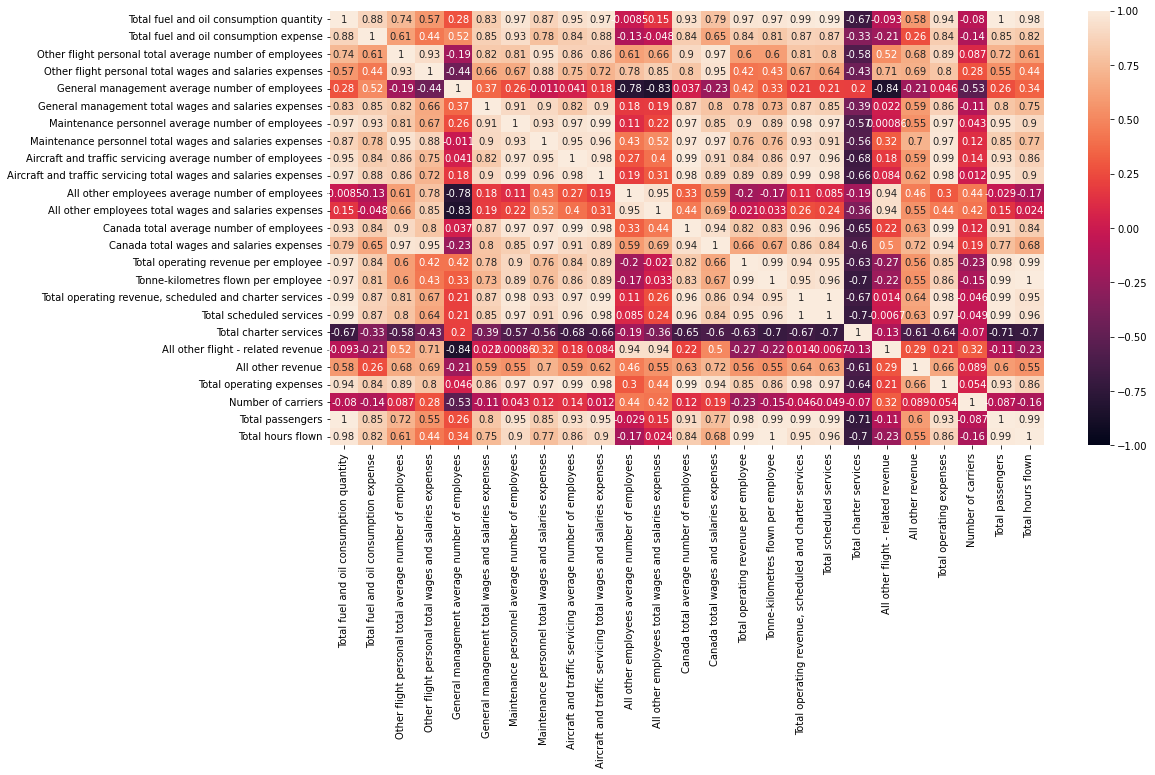

In [44]:
# Printing heatmap for the data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, vmin=-1)

<p>There is a high correlation for operating revenue with:
<ul>
    <li>Maintenance personal average number of employees (0.98) </li>
    <li>Aircraft and traffic servicing number of employees (0.97) </li>
    <li>Aircraft and traffic total wages and salaries expenses (0.99) </li>
    <li>Total fuel and oil consumption quantity (0.99) </li>
    <li>Total fuel and oil consumption expense (0.87)</li>
    <li>Canada total average number of employees (0.96)</li>
    <li>Total scheduled services (1)</li>
    <li>Total operating expense (0.98)</li>
    <li>Total passengers (0.99)</li>
    <li>Total hours flown (0.95)</li>
</ul>

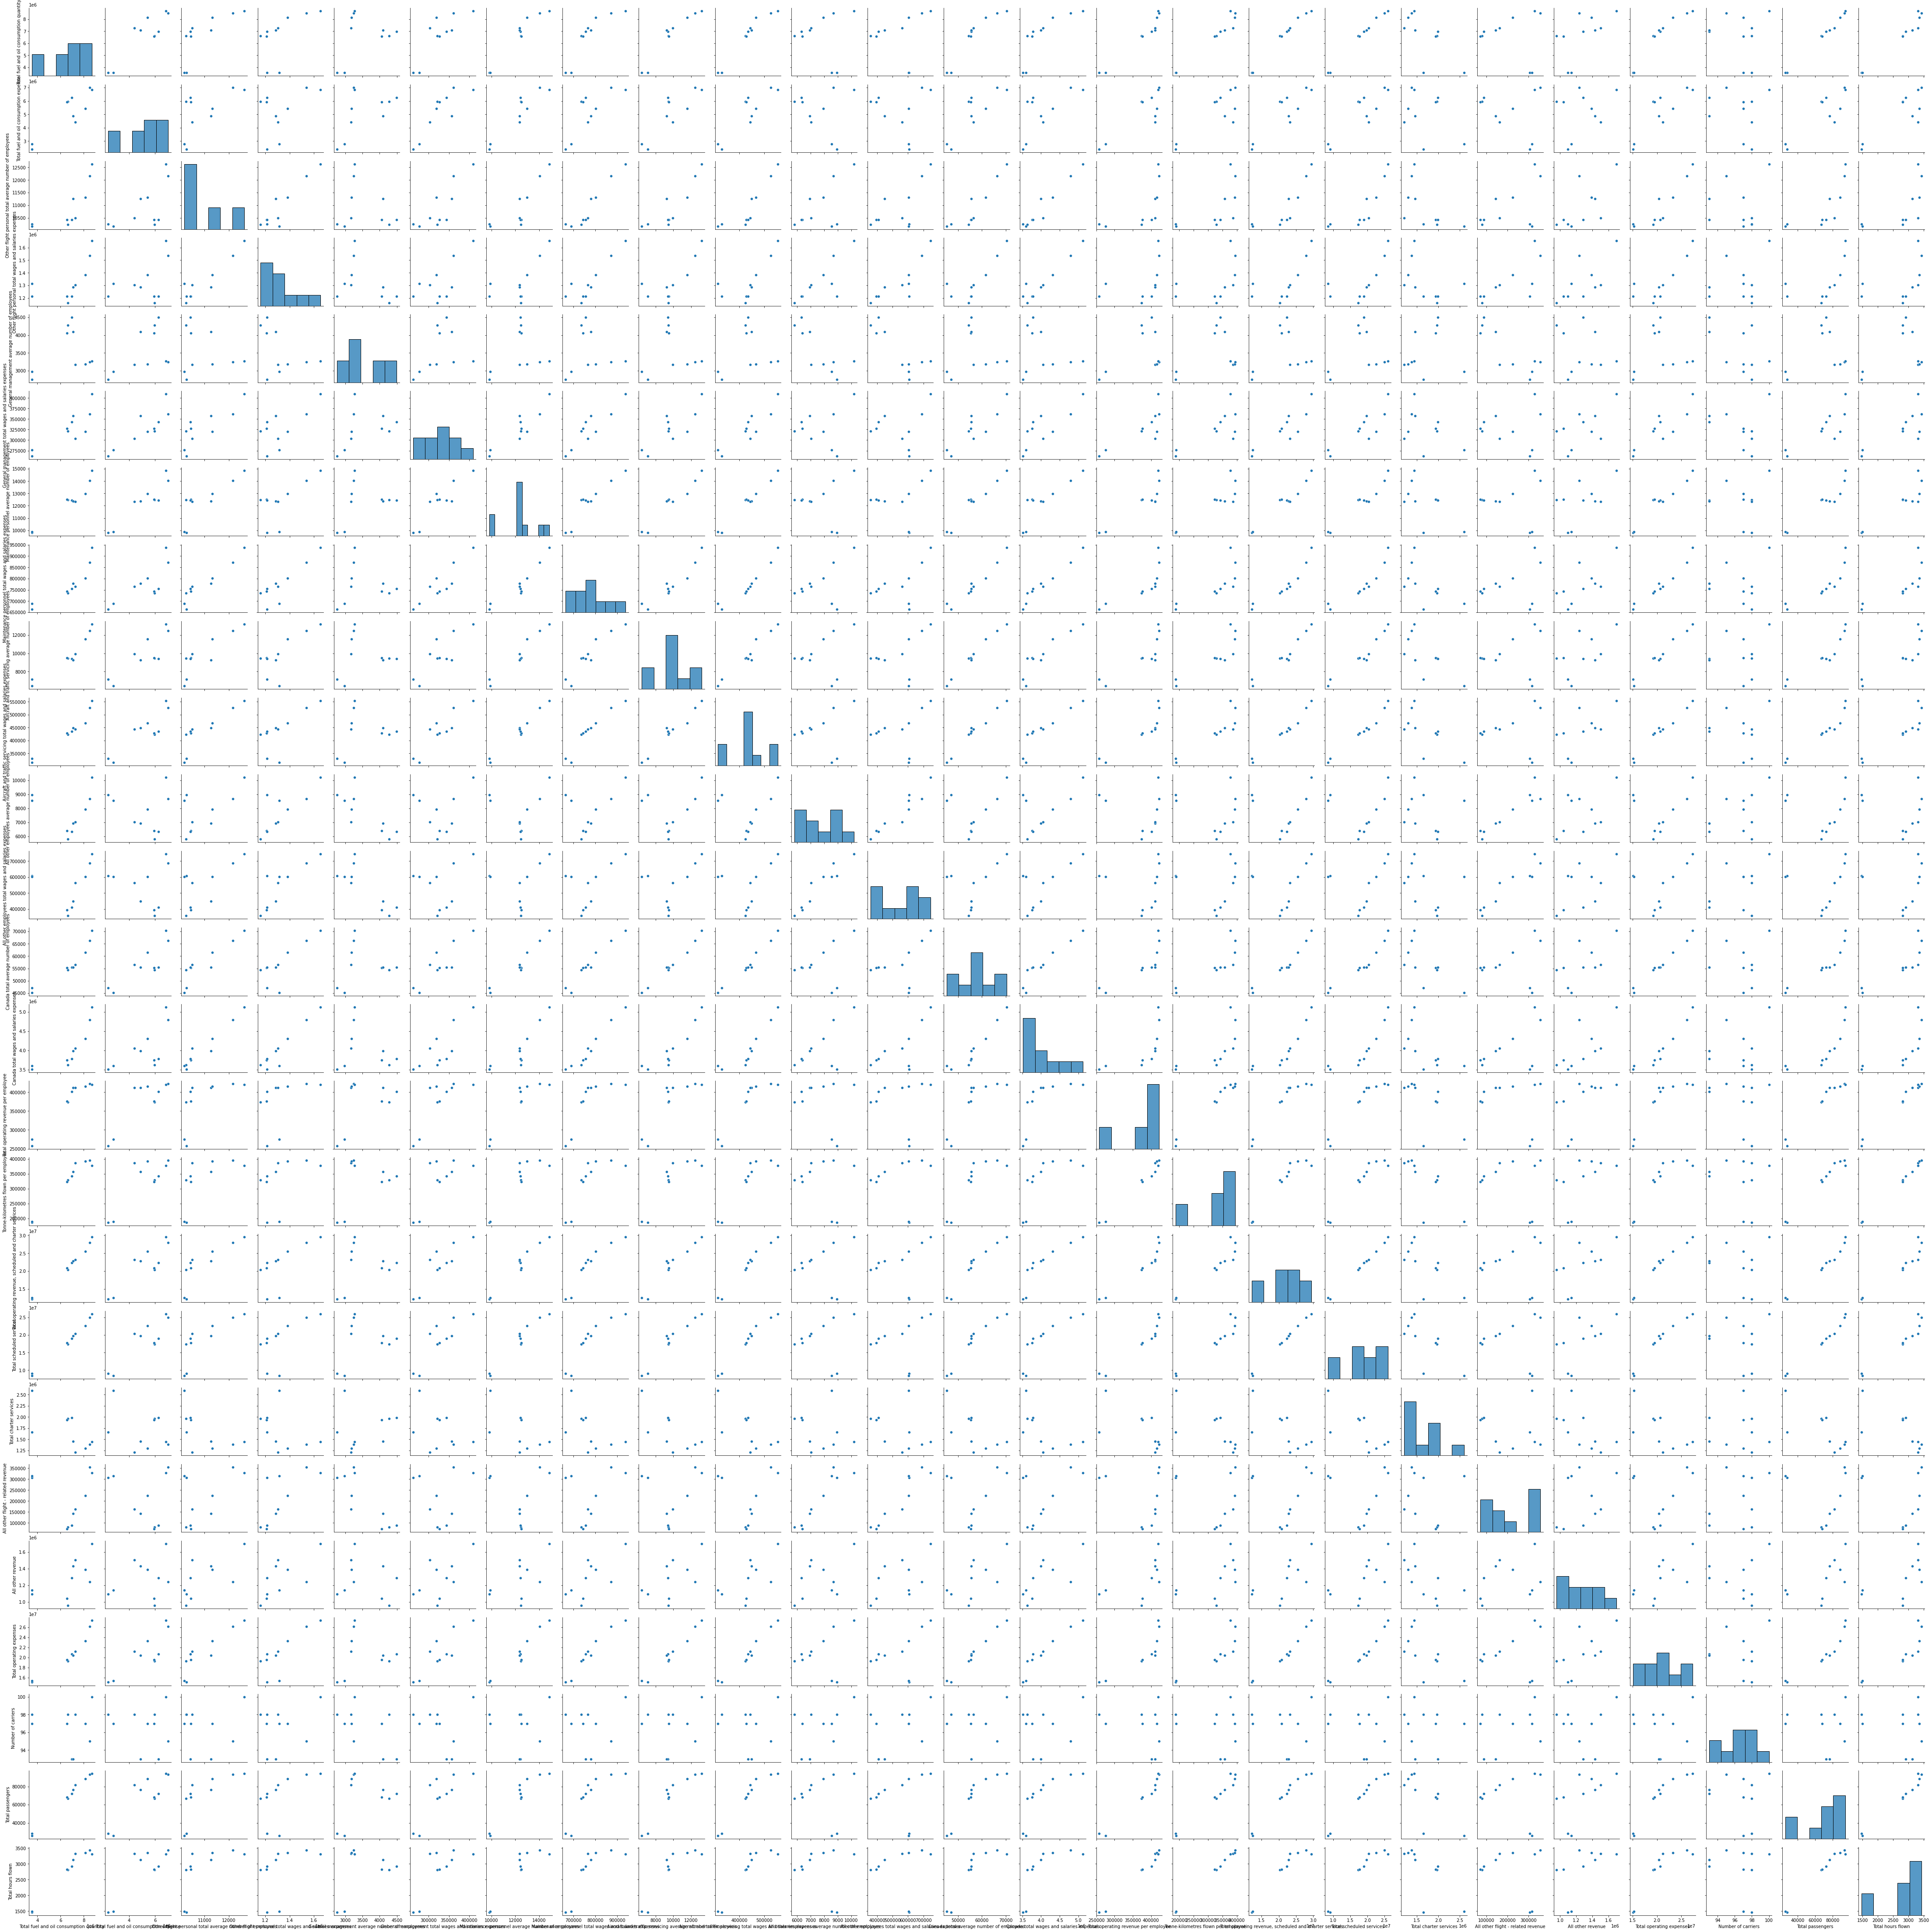

In [45]:
# Printing a pairplot to see to correlation of the different columns and filter any outliers
sns.pairplot(df)

<AxesSubplot: xlabel='Total fuel and oil consumption expense', ylabel='Total operating revenue, scheduled and charter services'>

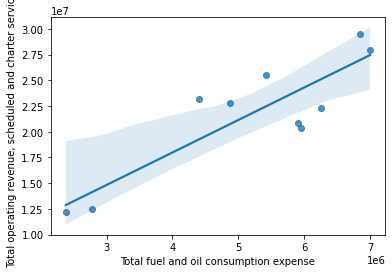

In [10]:
# Looking to see the correlation for linear regression
sns.regplot(data=df, y='Total operating revenue, scheduled and charter services', x='Total fuel and oil consumption expense')

<h3>Predicting total operating revenue with total fuel and oil consumption expense </h3>

In [18]:
y = np.array(df["Total operating revenue, scheduled and charter services"]).reshape(-1,1)
X = np.array(df["Total fuel and oil consumption expense"]).reshape(-1,1)

X.shape, y.shape

((10, 1), (10, 1))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LinearRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: ",r2_score(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy:  0.6225758117580187
MAE:  2607764.0453232513
RMSE:  3084745.2620104146


<p>Accuracy: 0.6225758117580187. The accuracy score of a regression model is typically determined by the coefficient of determination (R-squared) metric, which measures the proportion of the variance in the target variable that can be explained by the model. The accuracy score of 0.62 indicates that the model explains 62% of the variance in fuel and oil consumption expenses, which is moderate. </p>

<p>MAE: 2607764.0453232513. The mean absolute error (MAE) measures the average magnitude of the errors between the predicted and actual values, without considering their direction. The MAE value of 2607764.05 indicates that, on average, the model's predictions for fuel and oil consumption expenses are off by approximately $2,607,764.05.</p>

<p>RMSE: 3084745.2620104146. The root mean squared error (RMSE) measures the square root of the average of the squared differences between the predicted values and the actual values. The RMSE value of 3084745.26 indicates that the standard deviation of the residuals (the differences between the predicted values and the actual values) is approximately $3,084,745.26.</p>

In [35]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

print("Accuracy: ",r2_score(y_test, yhat))
print("MAE: ",mean_absolute_error(y_test, yhat))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, yhat)))

Accuracy:  0.9455083008580428
MAE:  891979.0
RMSE:  1172113.3598435207


<p>Accuracy: 0.9455083008580428. The accuracy score of the DecisionTreeRegressor model is significantly higher than the LinearRegression model, indicating that this model better explains the variance in fuel and oil consumption expenses. The accuracy score of 0.95 indicates that the model explains 95% of the variance in fuel and oil consumption expenses, which is high. </p>

<p>MAE: 891979.0. The mean absolute error (MAE) measures the average magnitude of the errors between the predicted and actual values, without considering their direction. The MAE value of 891979.0 indicates that, on average, the model's predictions for fuel and oil consumption expenses are off by approximately $891,979. </p>

<p>RMSE: 1172113.3598435207 The root mean squared error (RMSE) measures the square root of the average of the squared differences between the predicted values and the actual values. The RMSE value of 1172113.3598435207 indicates that the standard deviation of the residuals (the differences between the predicted values and the actual values) is approximately $1,172,113.36. </p>

<p>These metrics suggest that the model's predictions have a relatively low level of error, with a smaller difference between the predicted and actual values compared to the LinearRegression model. Therefore, the DecisionTreeRegressor model is likely to be a better choice for predicting fuel and oil consumption expenses based on total operating revenue.</p>